In [1]:
import startJVM
import jpype
import jpype.imports
import numpy as np
import matplotlib.pyplot as plt

/Users/hangal1/Documents/research/rda/radsim/proj-radsim/src


In [2]:
from gov.llnl.rtk.physics import Nuclides
from gov.llnl.rtk.physics import SourceImpl
from gov.llnl.rtk.physics import EmissionCalculator
from gov.bnl.nndc.ensdf.decay import BNLDecayLibrary
from gov.llnl.rtk.physics import Quantity

In [3]:
from java.nio.file import Paths
from gov.bnl.nndc.ensdf import EnsdfParser
from gov.bnl.nndc.ensdf.decay import SplitIsomers
from gov.bnl.nndc.ensdf.decay import SandiaFormatter
from gov.nist.physics.xray import NISTXrayLibrary

In [4]:
### beginning of demo section
# This is to test the calculate function with a chosen decay library
#Bq = ActivityUnit.Bq
activity = Quantity.of(100,"Bq")
Cs137 = SourceImpl.fromActivity(Nuclides.get("Cs137"), activity)
Ba137m = SourceImpl.fromActivity(Nuclides.get("Ba137m"), Quantity.of(94.7,"Bq"))

In [5]:
bnllib = BNLDecayLibrary()
bnllib.setXrayLibrary(NISTXrayLibrary.getInstance())
try:
    bnllib.loadFile(Paths.get("BNL2023.txt"))
except jpype.JException as ex:
    print(ex.stacktrace())
    raise ex
#bnllib.loadFile(Paths.get("BNL2023.txt"))
emcal = EmissionCalculator()
emcal.setDecayLibrary(bnllib)

from java.util import ArrayList
sourceList = ArrayList()
sourceList.add(Cs137)
sourceList.add(Ba137m)

beta_record = {'E':[], 'I': []}
gamma_record = {'E':[], 'I': []}
xray_record = {'E':[], 'I': []}

out = emcal.apply(sourceList)

for emission in out.getBetas():
    e_e = emission.getEnergy().getValue()
    e_i = emission.getIntensity().getValue()
    beta_record['E'].append(e_e)
    beta_record['I'].append(e_i)
    print("Beta-: ", e_e, e_i, emission.getForbiddenness())

for emission in out.getGammas():
    e_e = emission.getEnergy().getValue()
    e_i = emission.getIntensity().getValue()
    gamma_record['E'].append(e_e)
    gamma_record['I'].append(e_i)
    print("Gamma: ", e_e, e_i)

for emission in out.getXrays():
    e_e = emission.getEnergy().getValue()
    e_i = emission.getIntensity().getValue()
    xray_record['E'].append(e_e)
    xray_record['I'].append(e_i)
    print("Xray: ", e_e, e_i,emission.getName())


Beta-:  514.03 94.6994507431857 1U
Beta-:  892.1300000000001 0.000579996636019511 2U
Beta-:  1176.0 5.29996926017829 
Gamma:  283.5 0.00058
Gamma:  661.657 85.1353
Xray:  3.9539999999999997 0.0039861972746856 L3-M1
Xray:  4.331 0.0031580679094847996 L2-M1
Xray:  4.4513 0.011125309256458802 L3-M4
Xray:  4.4665 0.099945988578384 L3-M5
Xray:  4.8283000000000005 0.11481044145292799 L2-M4
Xray:  4.852 0.021539274484727998 L1-M2
Xray:  4.926 0.03625882354068 L1-M3
Xray:  4.9935 0.0007505941455167998 L3-N1
Xray:  5.1544 0.020326867063932 L3-N4,5
Xray:  5.5314 0.016763168949696 L2-N4
Xray:  5.796999999999999 0.0065265809393616 L1-N2
Xray:  5.8104 0.008654943631152 L1-N3
Xray:  31.452000000000005 0.0038779479452758564 K-L1
Xray:  31.817 2.0544464746672535 K-L2
Xray:  32.194 3.7840987830075132 K-L3
Xray:  36.304 0.3555689274899637 K-M2
Xray:  36.378 0.6867383620253872 K-M3
Xray:  36.645300000000006 0.010002101780727657 K-M4,5
Xray:  37.249 0.2648869864347053 K-N2,3
Xray:  37.3484 0.0027972035398

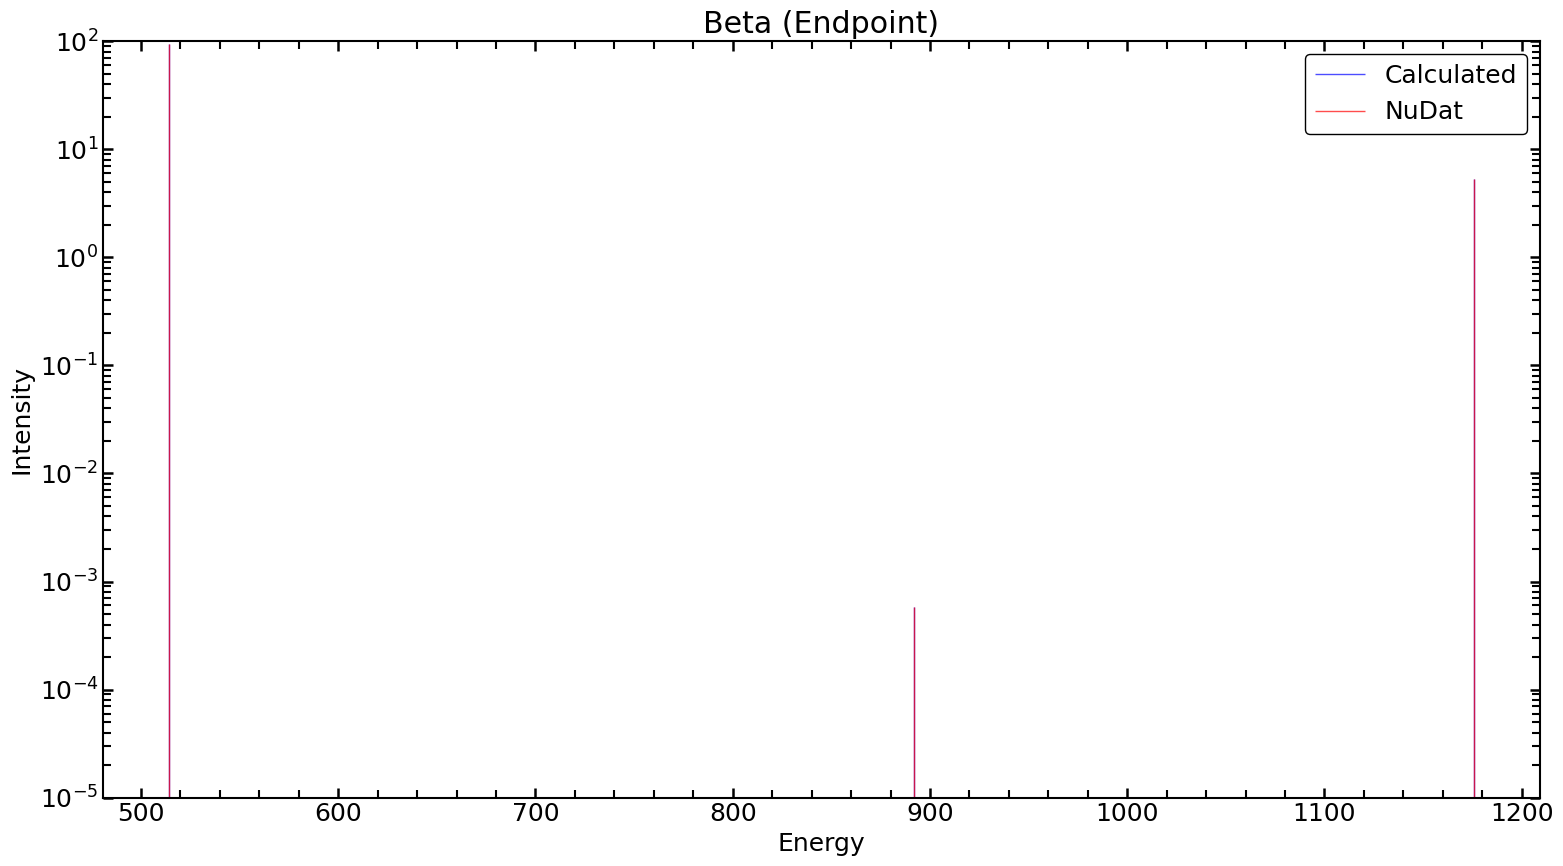

In [6]:
e_values = beta_record['E']
i_values = beta_record['I']
plt.vlines(e_values, ymin=0, ymax=i_values, linewidth=1, color='blue', label="Calculated", alpha=0.7)
E = [513.97, 892.13, 1175.63]
I = [94.70, 5.8E-4, 5.30]
plt.vlines(E, ymin=0, ymax=I, linewidth=1, color='red', label="NuDat", alpha=0.7)
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.yscale('log')
plt.ylim(ymin = 1E-5, ymax = 100)
plt.title('Beta (Endpoint)')
plt.legend()
plt.show()

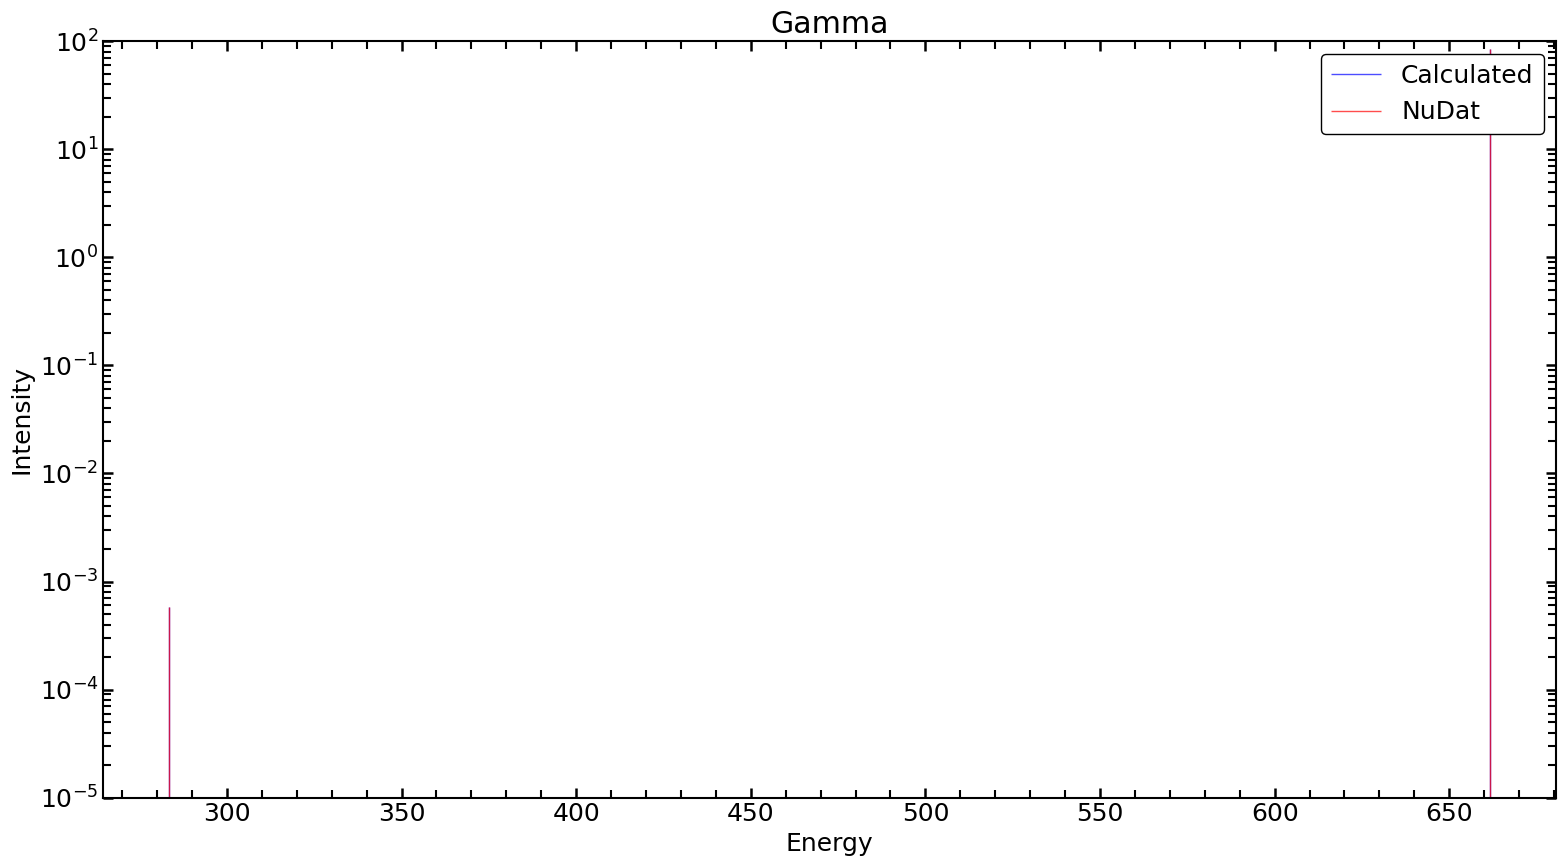

In [7]:
e_values = gamma_record['E']
i_values = gamma_record['I']
plt.vlines(e_values, ymin=0, ymax=i_values, linewidth=1, color='blue', label="Calculated", alpha=0.7)
E = [283.5, 661.657]
I = [5.8E-4, 85.10]
plt.vlines(E, ymin=0, ymax=I, linewidth=1, color='red', label="NuDat", alpha=0.7)
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.yscale('log')
plt.ylim(ymin = 1E-5, ymax = 100)
plt.title('Gamma')
plt.legend()
plt.show()

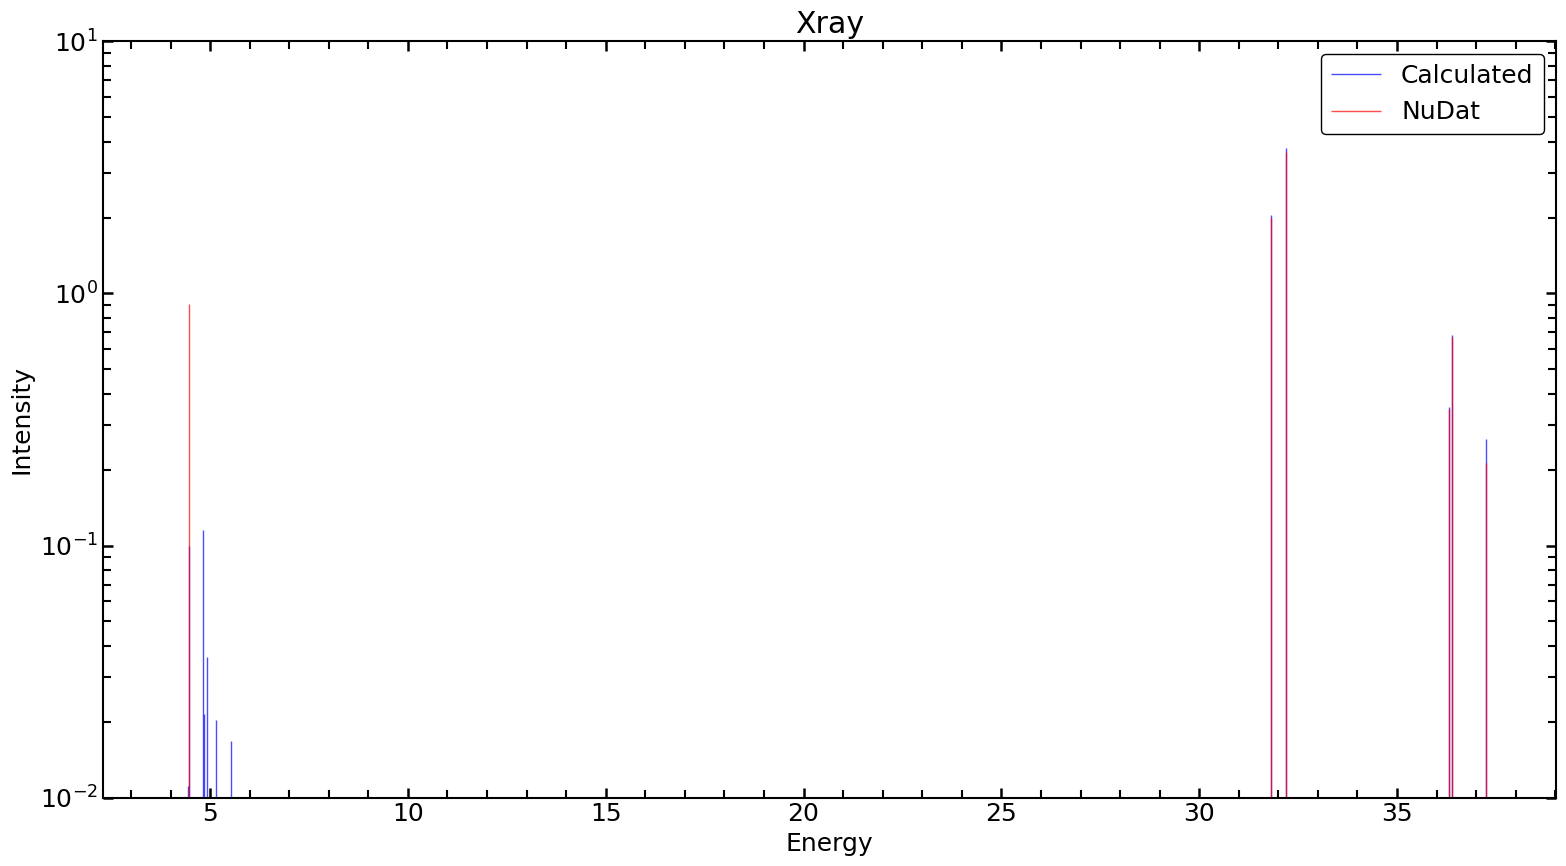

In [8]:
e_values = xray_record['E']
i_values = xray_record['I']
plt.vlines(e_values, ymin=0, ymax=i_values, linewidth=1, color='blue', label="Calculated", alpha=0.7)
E = [4.47, 31.817, 32.194, 36.304, 36.378, 37.255]
I = [0.91, 1.99, 3.64, 0.348, 0.672, 0.213]
plt.vlines(E, ymin=0, ymax=I, linewidth=1, color='red', label="NuDat", alpha=0.7)
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.yscale('log')
plt.ylim(ymin = 1E-2, ymax = 10)
plt.title('Xray')
plt.legend()
plt.show()